 # COVID19   DISEASE PREDICTION AND IDENTIFICATION  WITH DEEP                                 LEARNING NEURAL NETWORKS


# Importing the necessary libraries

In [ ]:
!pip uninstall numpy
!pip install numpy==1.23.1

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras.callbacks import ReduceLROnPlateau


import cv2
import os

In [56]:
labels = ['COVID19', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

# Loading the Dataset

In [59]:


#1.Collecting the data
from google.colab import drive
drive.mount('/content/drive')

train = get_training_data('/content/drive/My Drive/Colab Notebooks/Covid19_Deep_learning_NeuralNetworks/train')
test = get_training_data('/content/drive/My Drive/Colab Notebooks/Covid19_Deep_learning_NeuralNetworks/test')
val = get_training_data('/content/drive/My Drive/Colab Notebooks/Covid19_Deep_learning_NeuralNetworks/val')


data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Covid19_Deep_learning_NeuralNetworks/CovidCaseDetails.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-56-9340a2d40204>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


# Data Visualization & Preprocessing

In [ ]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("COVID19")
    else:
        l.append("NORMAL")
sns.set_style('darkgrid')


# Previewing the images of both the classes

Text(0.5, 1.0, 'NORMAL')

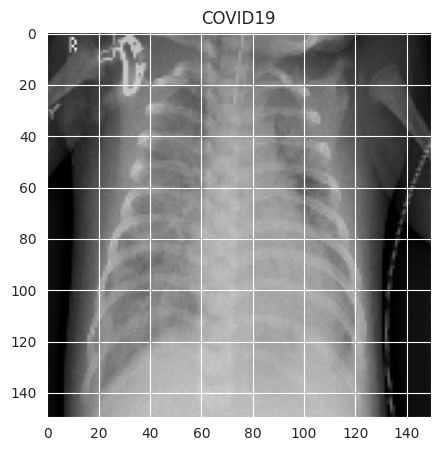

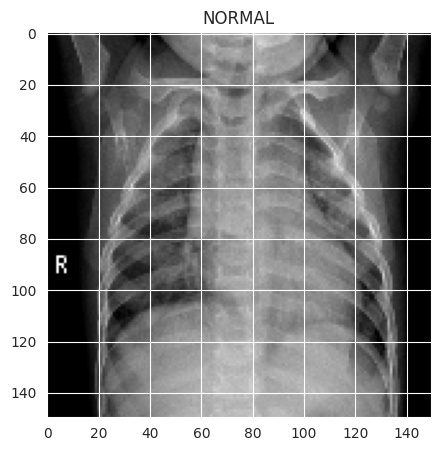

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

In [ ]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [ ]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [ ]:
# resize data for deep learning
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [ ]:
# With data augmentation to prevent overfitting and handling the imbalance in dataset

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

# Training the Model

**IMPLEMENTAITON WITH CNN ALGORITHM**

In [ ]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 150, 150, 32)      320       
                                                                 
 batch_normalization_5 (Bat  (None, 150, 150, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 75, 75, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 dropout_4 (Dropout)         (None, 75, 75, 64)        0         
                                                                 
 batch_normalization_6 (Bat  (None, 75, 75, 64)       

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [ ]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 12 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

Epoch 1/12
1/1 [==============================] - 4s 4s/step - loss: 1.9505 - accuracy: 0.5000 - val_loss: 0.8135 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/12
1/1 [==============================] - 1s 1s/step - loss: 26.3932 - accuracy: 0.5000 - val_loss: 0.6905 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/12
1/1 [==============================] - ETA: 0s - loss: 7.4187 - accuracy: 0.5000
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
1/1 [==============================] - 1s 803ms/step - loss: 7.4187 - accuracy: 0.5000 - val_loss: 1.1016 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/12
1/1 [==============================] - 1s 939ms/step - loss: 9.4026 - accuracy: 0.5000 - val_loss: 0.8162 - val_accuracy: 0.5000 - lr: 3.0000e-04
Epoch 5/12
1/1 [==============================] - 1s 937ms/step - loss: 4.4306 - accuracy: 0.6000 - val_loss: 0.6639 - val_accuracy: 0.6000 - lr: 3.0000e-04
Epoch 6/12
1/1 [==============================] - 1s 1s/step - loss: 2.6695

In [ ]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

1/1 [==============================] - 0s 149ms/step - loss: 1.7331 - accuracy: 0.5000
Loss of the model is -  1.733141541481018
1/1 [==============================] - 0s 158ms/step - loss: 1.7331 - accuracy: 0.5000
Accuracy of the model is -  50.0 %


# Analysis after Model Training

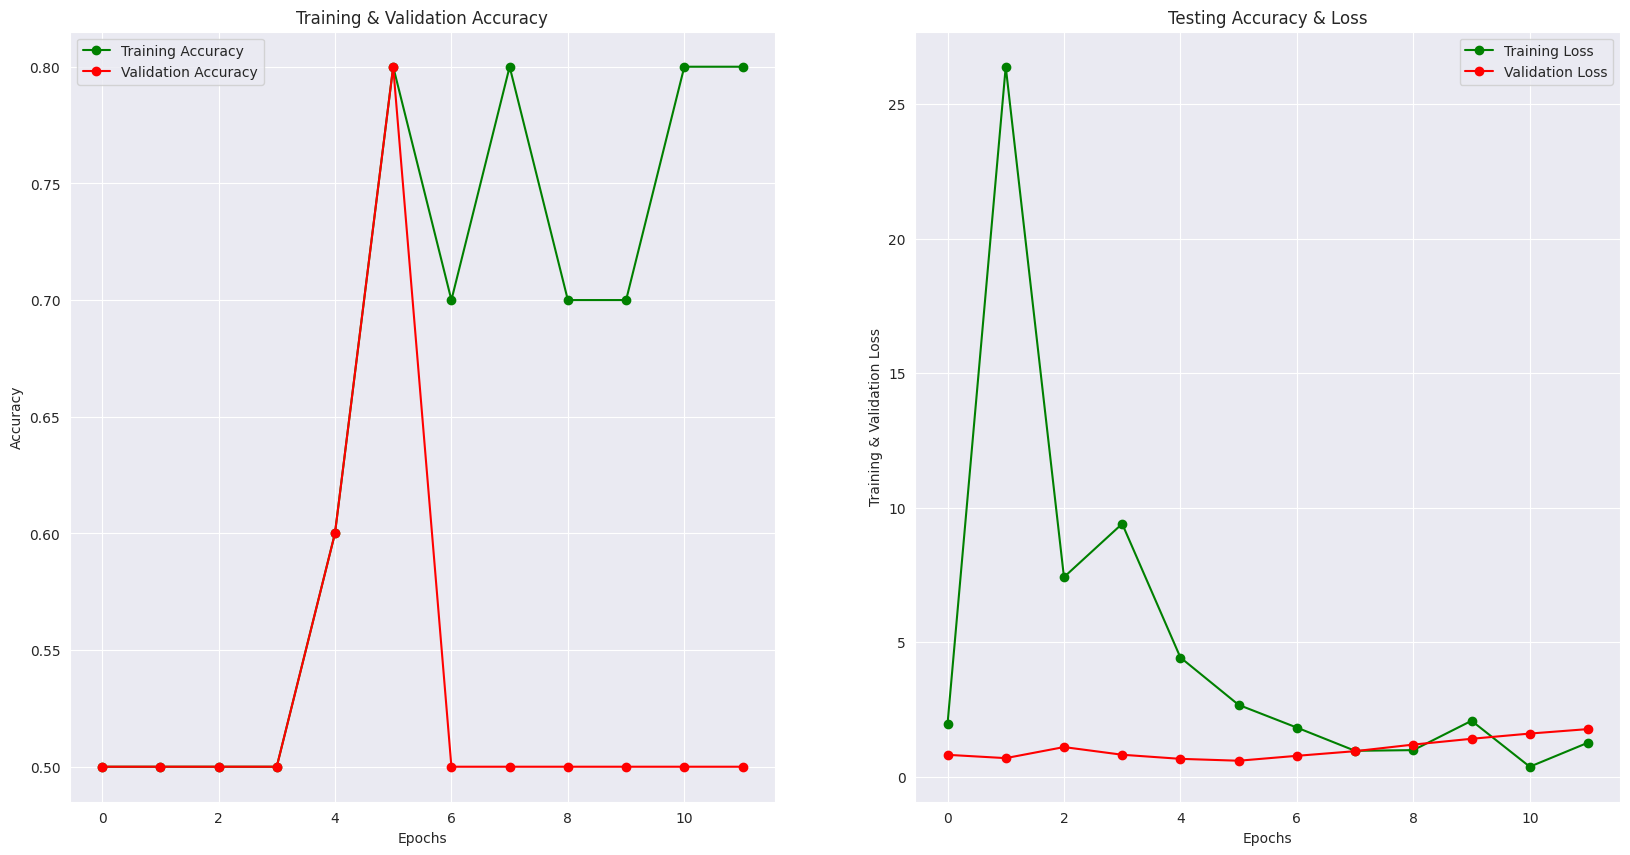

In [ ]:
epochs = [i for i in range(12)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

# Predictions

In [ ]:

predict_x=model.predict(x_test)
predictions=np.argmax(predict_x,axis=1)



predictions = predictions.reshape(1,-1)[0]
predictions[:15]



1/1 [==============================] - 0s 270ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
print(classification_report(y_test, predictions, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.50      1.00      0.67         5
   Normal (Class 1)       0.00      0.00      0.00         5

           accuracy                           0.50        10
          macro avg       0.25      0.50      0.33        10
       weighted avg       0.25      0.50      0.33        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cm = confusion_matrix(y_test,predictions)
cm

array([[5, 0],
       [5, 0]])

In [ ]:
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])

<Axes: >

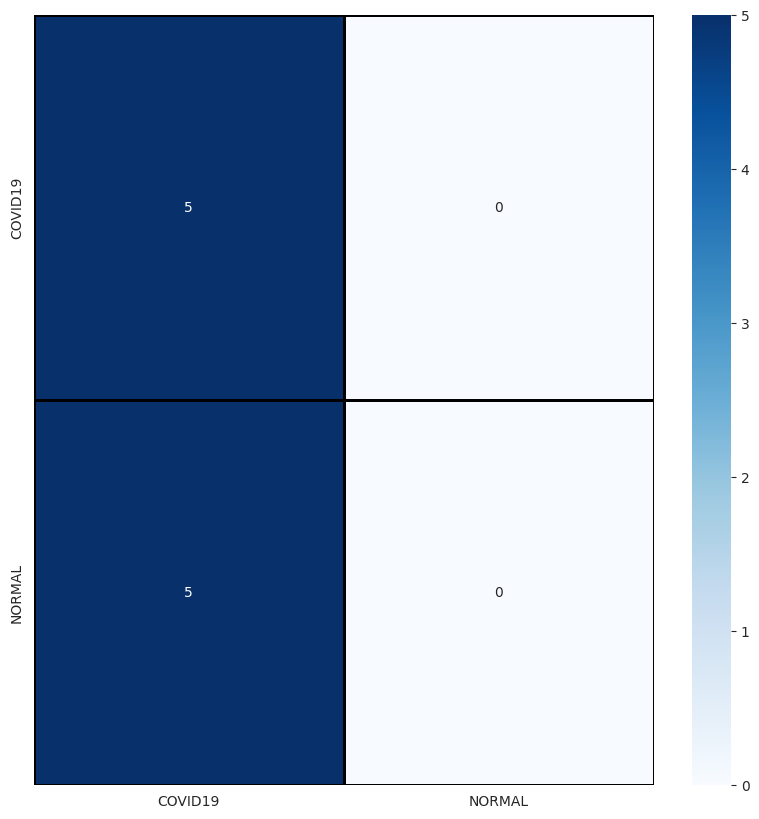

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

In [ ]:
correct = np.nonzero(predictions == y_test)[0]
incorrect = np.nonzero(predictions != y_test)[0]

**Some of the Correctly Predicted Classes COVID19 prediction**

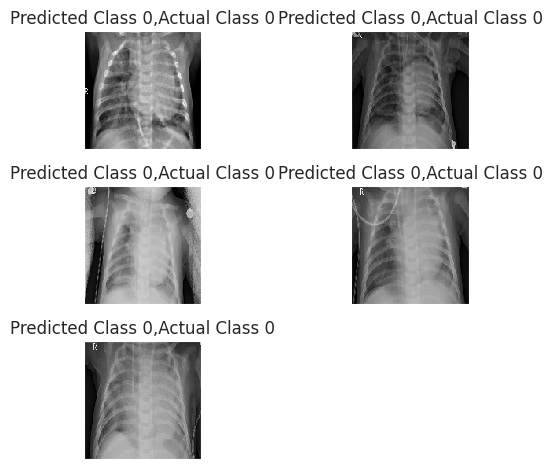

In [ ]:
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
   # plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

**Some of the Incorrectly Predicted Classes**

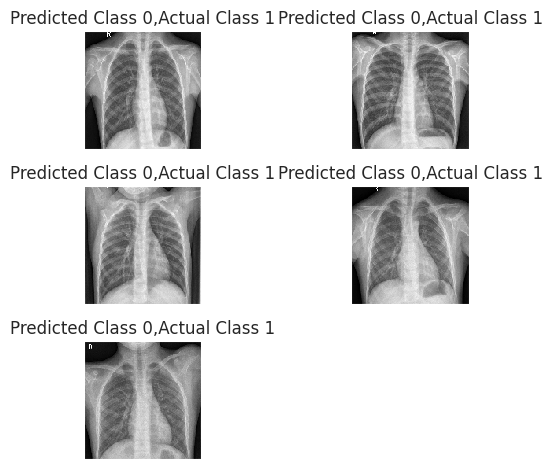

In [ ]:
i = 0
for c in incorrect[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

In [61]:
data.drop('id',axis=1,inplace=True)
data.head()

status  government_id  symptom_id  blood_pressure blood_pressure_range  \
0      P           1001         102             140               90-140   
1      P           1002         104             120               80-120   
2      P           1003         104             125               90-140   
3      P           1004         102             130               90-140   
4      P           1005         104             140               90-140   

   oxygen_level oxygen_level_range  body_temp body_temp_range symptoms  ...  \
0            78              70-80       99.0        99-101.9        H  ...   
1            79              70-80       93.0         93-94.9        L  ...   
2            75              70-80       93.5         93-94.9        L  ...   
3            80              80-90       99.0        99-101.9        H  ...   
4            80              80-90       93.0         93-94.9        L  ...   

  diagnosed_date age  gender            detected_place detected_district  \
0     30-01-2020  20       F                  Thrissur          Thrissur   
1       2/2/2020  21       M                 Alappuzha         Alappuzha   
2       3/2/2020  22       F                 Kasaragod         Kasaragod   
3       2/3/2020  45       M  East Delhi (Mayur Vihar)        East Delhi   
4       2/3/2020  24       M                 Hyderabad         Hyderabad   

  detected_state nationality current_status status_change_date  \
0         Kerala       India              R         14-02-2020   
1         Kerala       India              R         14-02-2020   
2         Kerala       India              R         14-02-2020   
3          Delhi       India              R         15-03-2020   
4      Telangana       India              R           2/3/2020   

                                      travel_details  
0                               Travelled from Wuhan  
1                               Travelled from Wuhan  
2                               Travelled from Wuhan  
3                      Travelled from Austria, Italy  
4  Travelled from Dubai to Bangalore on 20th Feb,...  

[5 rows x 21 columns]

In [62]:
data.drop(['diagnosed_date','status_change_date'],axis=1,inplace=True)
data.drop(['travel_details'],axis=1,inplace=True)
data.head()

status  government_id  symptom_id  blood_pressure blood_pressure_range  \
0      P           1001         102             140               90-140   
1      P           1002         104             120               80-120   
2      P           1003         104             125               90-140   
3      P           1004         102             130               90-140   
4      P           1005         104             140               90-140   

   oxygen_level oxygen_level_range  body_temp body_temp_range symptoms  \
0            78              70-80       99.0        99-101.9        H   
1            79              70-80       93.0         93-94.9        L   
2            75              70-80       93.5         93-94.9        L   
3            80              80-90       99.0        99-101.9        H   
4            80              80-90       93.0         93-94.9        L   

  other_diseases  age gender            detected_place detected_district  \
0     Cholestrol   20      F                  Thrissur          Thrissur   
1            NaN   21      M                 Alappuzha         Alappuzha   
2          sugar   22      F                 Kasaragod         Kasaragod   
3            NaN   45      M  East Delhi (Mayur Vihar)        East Delhi   
4    skinproblem   24      M                 Hyderabad         Hyderabad   

  detected_state nationality current_status  
0         Kerala       India              R  
1         Kerala       India              R  
2         Kerala       India              R  
3          Delhi       India              R  
4      Telangana       India              R

In [ ]:
#3.Analyze the data

In [63]:
train,test=train_test_split(data,test_size=0.3)
print(train.shape)
print(test.shape)

(1890, 18)
(811, 18)


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2701 entries, 0 to 2700
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   status                2701 non-null   object 
 1   government_id         2701 non-null   int64  
 2   symptom_id            2701 non-null   int64  
 3   blood_pressure        2701 non-null   int64  
 4   blood_pressure_range  2701 non-null   object 
 5   oxygen_level          2701 non-null   int64  
 6   oxygen_level_range    2701 non-null   object 
 7   body_temp             2701 non-null   float64
 8   body_temp_range       2701 non-null   object 
 9   symptoms              2701 non-null   object 
 10  other_diseases        2677 non-null   object 
 11  age                   2701 non-null   int64  
 12  gender                2701 non-null   object 
 13  detected_place        2701 non-null   object 
 14  detected_district     2697 non-null   object 
 15  detected_state       

In [65]:
data.describe()


government_id   symptom_id  blood_pressure  oxygen_level    body_temp  \
count    2701.000000  2701.000000     2701.000000   2701.000000  2701.000000   
mean     2351.000000   102.977416       98.825250     89.243243    96.872973   
std       779.855863     1.292661       25.427701      8.837487     4.051061   
min      1001.000000   101.000000       60.000000     23.000000    91.000000   
25%      1676.000000   102.000000       80.000000     85.000000    93.000000   
50%      2351.000000   103.000000       87.000000     92.000000    97.600000   
75%      3026.000000   104.000000      125.000000     95.000000    99.600000   
max      3701.000000   105.000000      150.000000     99.000000   105.000000   

               age  
count  2701.000000  
mean     44.658645  
std      19.665549  
min       1.000000  
25%      31.000000  
50%      44.000000  
75%      56.000000  
max      99.000000

In [67]:
prediction_var=['government_id','age','symptom_id','blood_pressure','oxygen_level','body_temp']

In [68]:
#TRAINING DATA
#input training data for Status
train_X=train[prediction_var]
#output training data
train_Y=train['status']

In [69]:
#input training data for Symptoms
train_X=train[prediction_var]
#output training data
train_Y1=train['symptoms']

In [70]:
#input training data for Currentstatus
train_X=train[prediction_var]
#output training data
train_Z=train['current_status']

In [71]:
#TESTING DATA
#same steps for testing data
#input testing data for Status
test_X=test[prediction_var]
#output testing data
test_Y=test['status']

In [72]:
#same steps for testing data
#input testing data for Symptoms
test_X=test[prediction_var]
#output testing data
test_Y1=test['symptoms']

In [73]:
#same steps for testing data Current status
#input testing data Current_Status
test_X=test[prediction_var]
#output testing data
test_Z=test['current_status']

In [74]:
#Training the model Status

logistic_model=LogisticRegression()
logistic_model.fit(train_X,train_Y)

LogisticRegression()

In [75]:
#Testing the algorithm Status
predicted_value=logistic_model.predict(test_X)

In [80]:
#SYMPTOMS
#accuracy for Symptoms
metrics.accuracy_score(test_Y1,predicted_value)
#prediction using symptoms
pd.DataFrame({'predicted_value':predicted_value,'KnowO/P':test_Y1})

predicted_value KnowO/P
1392               N      VL
170                N      VL
906                N      VL
2327               N       M
715                N       M
...              ...     ...
591                P       H
1299               N       L
390                N      VL
845                P       H
1496               N       L

[811 rows x 2 columns]

Number of discrete Columns is 9
symptom_id has 5 discrete values
blood_pressure_range has 3 discrete values
oxygen_level_range has 8 discrete values
body_temp_range has 5 discrete values
symptoms has 5 discrete values
other_diseases has 10 discrete values
gender has 2 discrete values
nationality has 9 discrete values
current_status has 3 discrete values


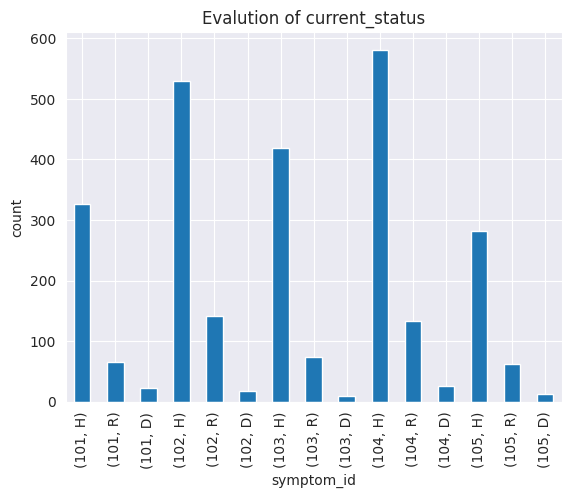

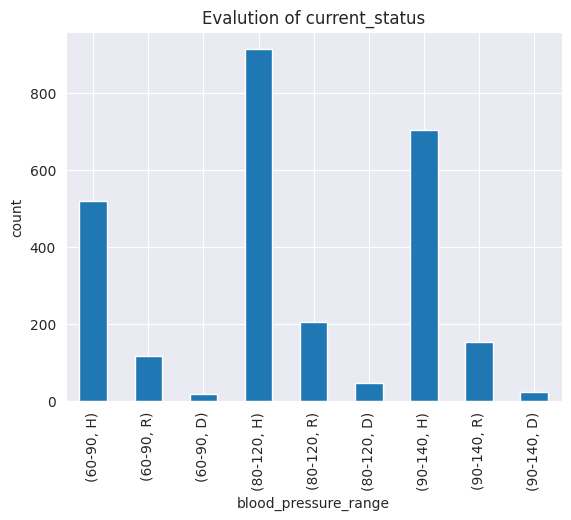

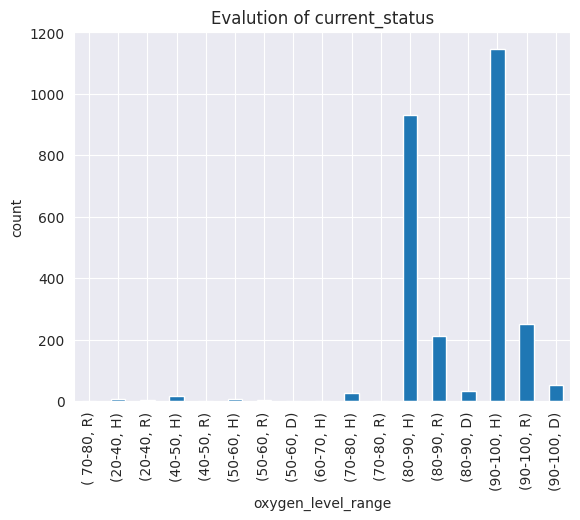

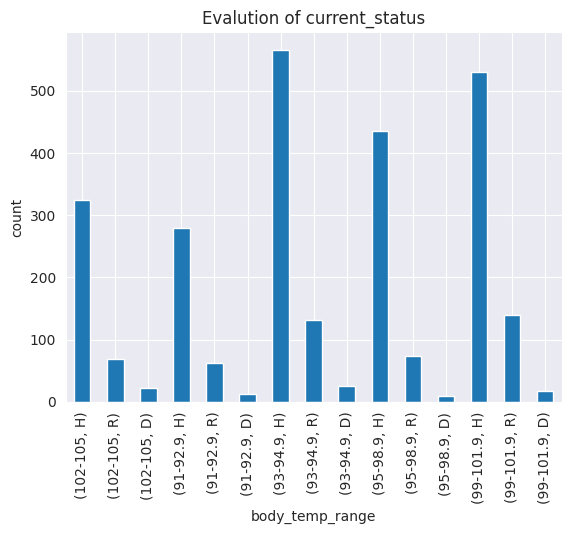

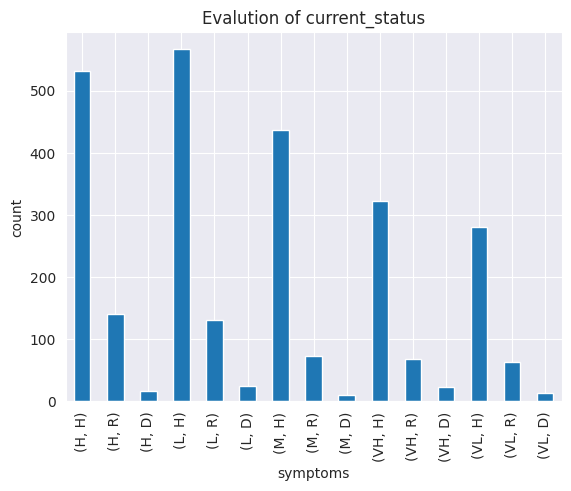

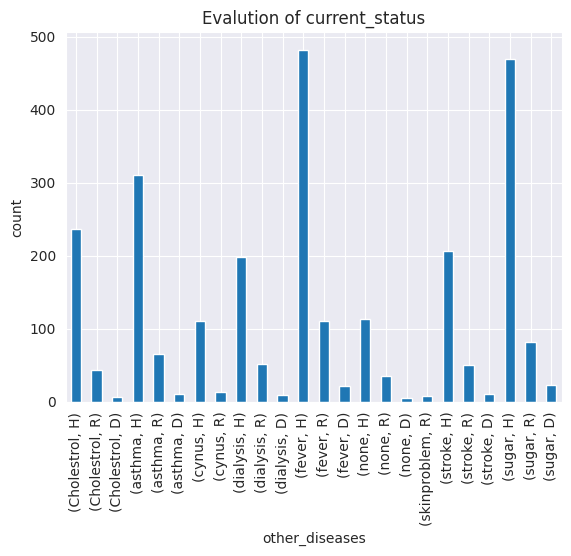

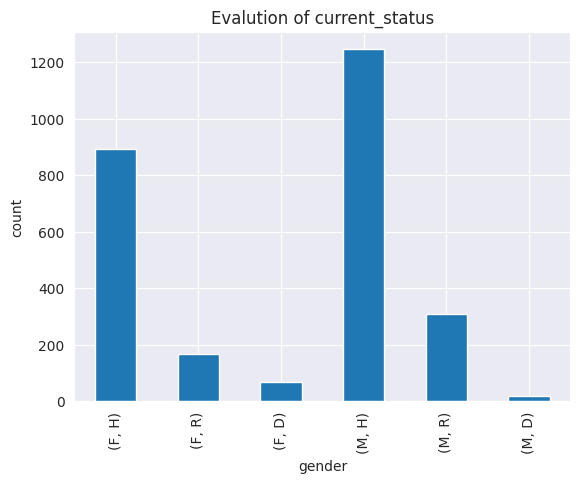

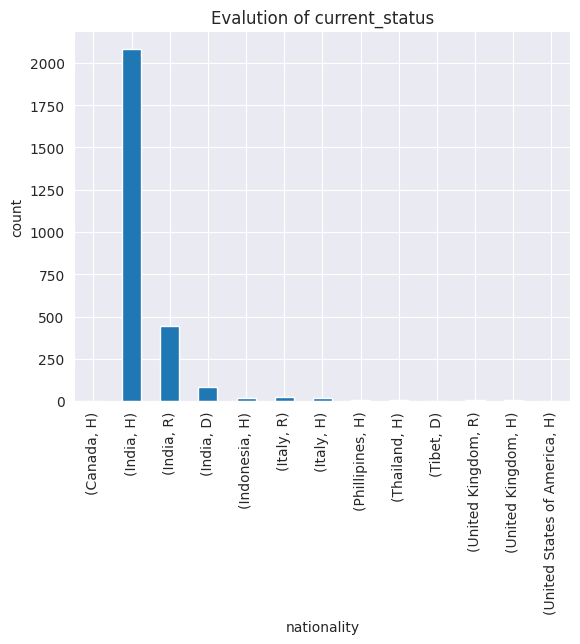

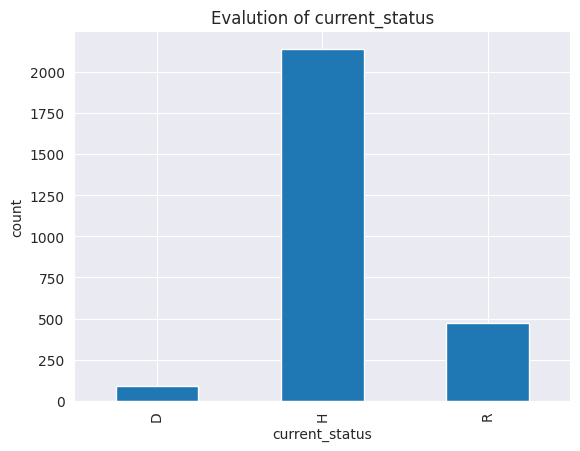

In [85]:
# Check if any numerical columns are discrete
discrete_columns = [feature for feature in data.columns if len(data[feature].unique()) < 20 and feature not in ['status'] ]
print(f'Number of discrete Columns is {len(discrete_columns)}')
for i in discrete_columns:
    print(f'{i} has {len(data[i].unique())} discrete values')

data[discrete_columns].head()

#Check distribution of the discrete data current_status
for feature in discrete_columns:
    dt=data.copy()
    dt.groupby(feature)['current_status'].value_counts().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title('Evalution of current_status')
    plt.show()